# Кластеризация клиентов и построение модели прогнозирования оттока клиентов сети фитнес-центров

## Описание проекта

- Заказчик проекта — сеть фитнес-центров «Культурист-датасаентист». 
- Задача проекта — провести анализ и разработать план действий по удержанию клиентов фитнес-центра:
    - спрогнозировать вероятность оттока для каждого клиента, 
    - сформировать портрет потребителя, 
    - определить основные признаки, влияющие на отток пользователей, 
    - сформулировать и предоставить рекомендации по удержанию клиентов.

Считается, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал.

## Описание данных

Исследование основано на внутренних данных сети фитнес-центров, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. 

Данные выданы в нескольких csv-файлах. 

Таблица gym включает следующие поля:
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон;
- 'Churn' — факт оттока в текущем месяце.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Посмотрите-на-датасет:-есть-ли-в-нем-отсутствующие-признаки,-изучите-средние-значения-и-стандартные-отклонения-(пригодится-метод-describe())" data-toc-modified-id="Посмотрите-на-датасет:-есть-ли-в-нем-отсутствующие-признаки,-изучите-средние-значения-и-стандартные-отклонения-(пригодится-метод-describe())-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe())</a></span></li><li><span><a href="#Посмотрите-на-средние-значения-признаков-в-двух-группах-—-тех,-кто-ушел-в-отток-и-тех,-кто-остался-(воспользуйтесь-методом-groupby())" data-toc-modified-id="Посмотрите-на-средние-значения-признаков-в-двух-группах-—-тех,-кто-ушел-в-отток-и-тех,-кто-остался-(воспользуйтесь-методом-groupby())-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby())</a></span></li><li><span><a href="#Постройте-столбчатые-гистограммы-и-распределения-признаков-для-тех,-кто-ушёл-(отток)-и-тех,-кто-остался-(не-попали-в-отток)" data-toc-modified-id="Постройте-столбчатые-гистограммы-и-распределения-признаков-для-тех,-кто-ушёл-(отток)-и-тех,-кто-остался-(не-попали-в-отток)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)</a></span></li><li><span><a href="#Постройте-матрицу-корреляций-и-отобразите-её" data-toc-modified-id="Постройте-матрицу-корреляций-и-отобразите-её-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Постройте матрицу корреляций и отобразите её</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA):-выводы" data-toc-modified-id="Исследовательский-анализ-данных-(EDA):-выводы-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA): выводы</a></span></li></ul></li><li><span><a href="#Построение-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-модели-прогнозирования-оттока-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение модели прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Разбейте-данные-на-обучающую-и-валидационную-выборку-функцией-train_test_split()." data-toc-modified-id="Разбейте-данные-на-обучающую-и-валидационную-выборку-функцией-train_test_split().-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Разбейте данные на обучающую и валидационную выборку функцией train_test_split().</a></span></li><li><span><a href="#Обучите-модель-на-train-выборке-двумя-способами:" data-toc-modified-id="Обучите-модель-на-train-выборке-двумя-способами:-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обучите модель на train-выборке двумя способами:</a></span></li><li><span><a href="#Оцените-метрики-accuracy,-precision-и-recall-для-обеих-моделей-на-валидационной-выборке.-Сравните-по-ним-модели.-Какая-модель-показала-себя-лучше-на-основании-метрик?" data-toc-modified-id="Оцените-метрики-accuracy,-precision-и-recall-для-обеих-моделей-на-валидационной-выборке.-Сравните-по-ним-модели.-Какая-модель-показала-себя-лучше-на-основании-метрик?-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?</a></span></li><li><span><a href="#Построение-модели-прогнозирования-оттока-клиентов:-выводы" data-toc-modified-id="Построение-модели-прогнозирования-оттока-клиентов:-выводы-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Построение модели прогнозирования оттока клиентов: выводы</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Стандартизируйте-данные." data-toc-modified-id="Стандартизируйте-данные.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Стандартизируйте данные.</a></span></li><li><span><a href="#Постройте-матрицу-расстояний-функцией-linkage()-на-стандартизованной-матрице-признаков-и-нарисуйте-дендрограмму." data-toc-modified-id="Постройте-матрицу-расстояний-функцией-linkage()-на-стандартизованной-матрице-признаков-и-нарисуйте-дендрограмму.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму.</a></span></li><li><span><a href="#Обучите-модель-кластеризации-на-основании-алгоритма-K-Means-и-спрогнозируйте-кластеры-клиентов.-Договоримся-за-число-кластеров-принять-n=5,-чтобы-ваши-результаты-можно-было-сравнивать-с-результатами-остальных-студентов.-Однако,-конечно,-в-жизни-никто-не-скажет-вам-правильный-ответ,-и-решение-остаётся-за-вами-(на-основании-изучения-графика-из-предыдущего-пункта)." data-toc-modified-id="Обучите-модель-кластеризации-на-основании-алгоритма-K-Means-и-спрогнозируйте-кластеры-клиентов.-Договоримся-за-число-кластеров-принять-n=5,-чтобы-ваши-результаты-можно-было-сравнивать-с-результатами-остальных-студентов.-Однако,-конечно,-в-жизни-никто-не-скажет-вам-правильный-ответ,-и-решение-остаётся-за-вами-(на-основании-изучения-графика-из-предыдущего-пункта).-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).</a></span></li><li><span><a href="#Посмотрите-на-средние-значения-признаков-для-кластеров.-Можно-ли-сразу-что-то-заметить?-Постройте-распределения-признаков-для-кластеров.-Можно-ли-что-то-заметить-по-ним?" data-toc-modified-id="Посмотрите-на-средние-значения-признаков-для-кластеров.-Можно-ли-сразу-что-то-заметить?-Постройте-распределения-признаков-для-кластеров.-Можно-ли-что-то-заметить-по-ним?-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить? Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?</a></span></li><li><span><a href="#Для-каждого-полученного-кластера-посчитайте-долю-оттока-(методом-groupby()).-Отличаются-ли-они-по-доле-оттока?-Какие-кластеры-склонны-к-оттоку,-а-какие-—-надёжны?" data-toc-modified-id="Для-каждого-полученного-кластера-посчитайте-долю-оттока-(методом-groupby()).-Отличаются-ли-они-по-доле-оттока?-Какие-кластеры-склонны-к-оттоку,-а-какие-—-надёжны?-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?</a></span></li><li><span><a href="#Кластеризация-клиентов:-выводы" data-toc-modified-id="Кластеризация-клиентов:-выводы-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Кластеризация клиентов: выводы</a></span></li></ul></li><li><span><a href="#Выводы-и-базовые-рекомендации-по-работе-с-клиентами" data-toc-modified-id="Выводы-и-базовые-рекомендации-по-работе-с-клиентами-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы и базовые рекомендации по работе с клиентами</a></span></li></ul></div>

## Исследовательский анализ данных (EDA)

### Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe())

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 


# <Убираем предупреждения>
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [2]:
gym = pd.read_csv('...')

# <Меняем регистр названий столбцов>
gym.columns = map(str.lower, gym.columns)

gym.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
print('Размер датасета gym:', gym.shape)

Размер датасета gym: (4000, 14)


In [4]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


- Распределение по признаку gender почти равномерно (представителей пола 1 чуть больше, но незначительно)
- В фитнес-центр Культурист-датасаентист в основном ходят люди, которые живут или работают рядом (85% клиентов)
- Почти половина клиентов фитнес-клуба являются сотрудниками компаний-партнёров клуба и получают скидки на фитнес
- 30% клиентов купили абонемент на фитнес по акции "Приведи друга"
- 90% клиентов оставили контактный телефон для связи
- Средний срок действия абонемента на фитнес - 4.7 месяцев
- Чуть больше 40% клиентов посещают групповые занятия
- Средний возраст клиентов - 29 лет
- Средняя суммарная выручка от дополнительных услуг фитнес-центра равна 147
- Средний срок до окончания договора - 4.3 месяца
- Среднее время с момента первого обращения в фитнес-центр - 3.7 месяца
- Средняя частота посещений в неделю за все время с начала действия абонемента - 1.9 раза в неделю
- Средняя частота посещений в неделю за предыдущий месяц - 1.8 раза в неделю
- 27% клиентов перестали пользоваться услугами фитнес-центра в текущем месяце

In [5]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [6]:
print('Количество пропусков в таблице gym:')
print()
print(gym.isnull().sum()) 

Количество пропусков в таблице gym:

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64


In [7]:
# <Ищем дубликаты по всем строкам таблицы>
print('Количество дубликатов в таблице gym:', 
      gym.duplicated(
          subset = gym.columns,
          keep = 'first'
      ).sum()
     )

print('Процент дубликатов в таблице gym: {:.2%}'.format(gym.duplicated(
          subset = gym.columns,
          keep = 'first'
      ).sum()/4000))

Количество дубликатов в таблице gym: 0
Процент дубликатов в таблице gym: 0.00%


### Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby())

In [8]:
gym_groupby = gym.groupby('churn').mean().reset_index()
gym_groupby

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


- Рапределение по полу почти не отличается
- Среди тех, кто ушел в отток, больше тех, кто жил и работал далеко от фитнес-центра
- Сотрудники компаний-партнеров почти на 20% реже перестают посещать спортзал
- Клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток
- Предоставление контактного номера телефона не влияет на уход в отток
- Средняя длительность договора почти в 2 раза больше у оставшихся клиентов
- Оставшиеся пользователи почти в 2 раза чаще ходят на групповые занятия 
- Средний возраст оставшихся клиентов - 30 лет, средний возраст клиентов, ушедших в отток - 27 лет
- Больше средней выручки от дополнительных услуг приносят оставшиеся клиенты 158 по сравнению со 115 для оттока
- Оставшееся время до окончания срока действия договора больше у оставшихся клиентов
- Среднее время с момента первого обращения в фитнес-центр - 5 месяцев у оставшихся клиентов и 1 месяц у ушедших в отток
- У ушедших в отток клиентов средняя частота посещений в неделю за все время с начала действия абонемента - 1.5 раза в неделю, а у оставшихся - 2 раза в неделю
- Средняя частота посещений в неделю за предыдущий месяц - 1 раз в неделю у ушедших в отток, а у оставшихся - 2 раза в неделю

### Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

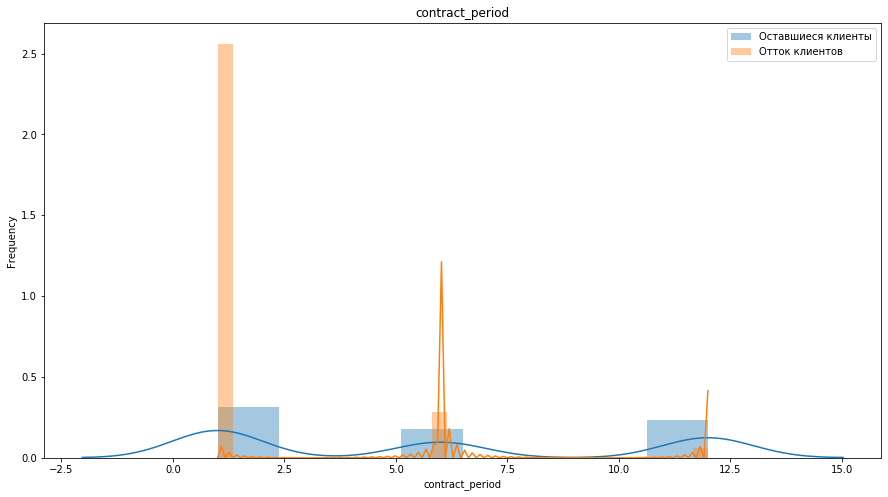

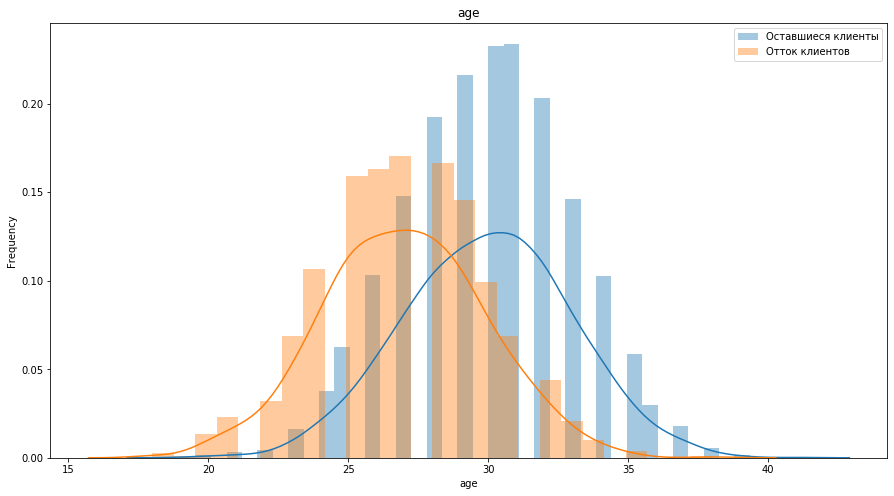

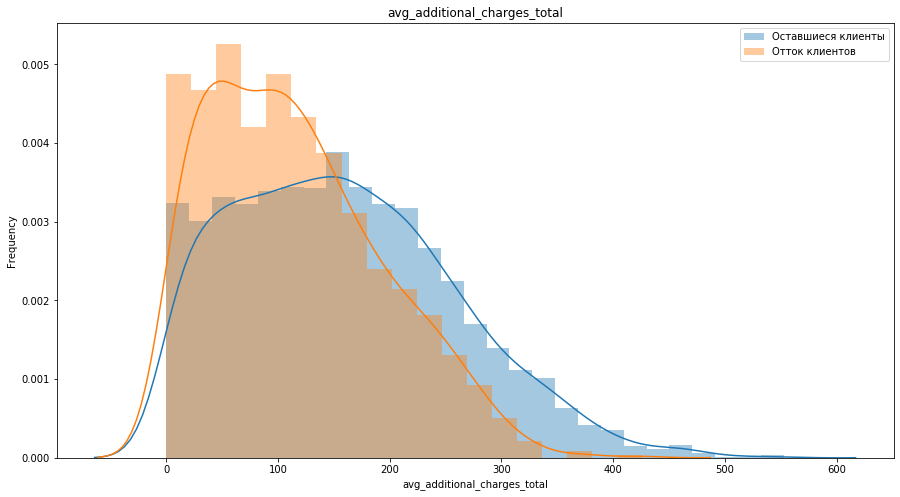

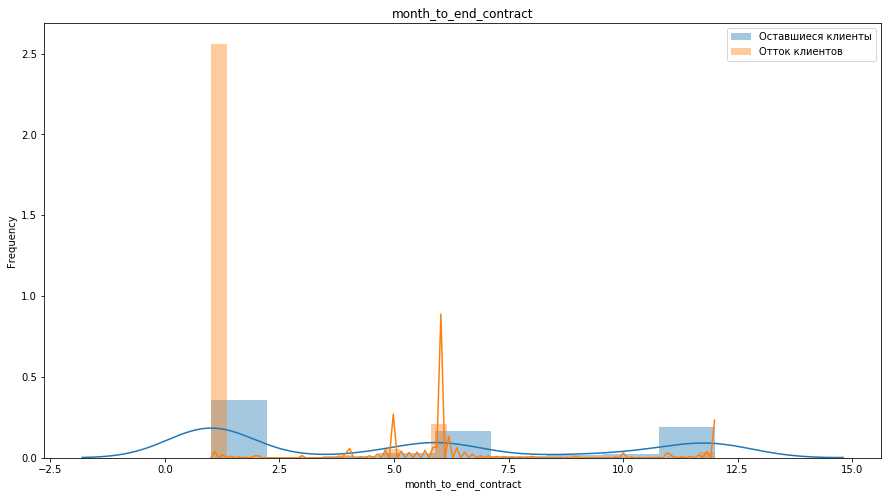

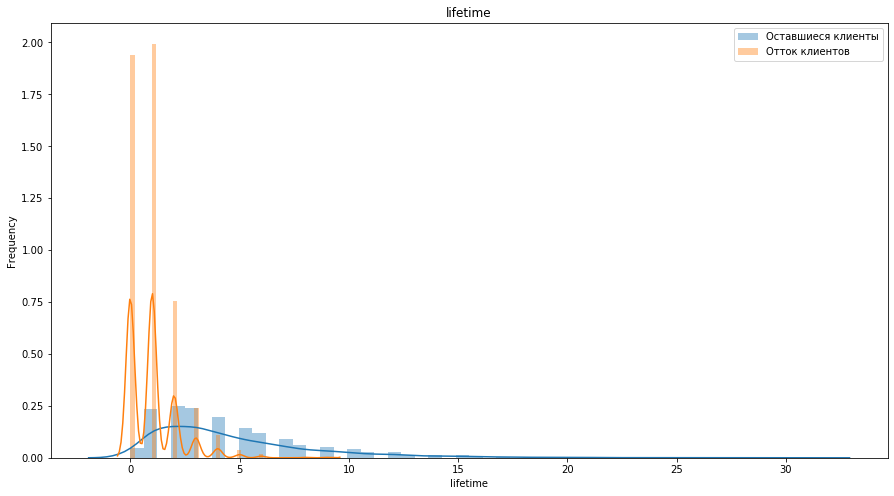

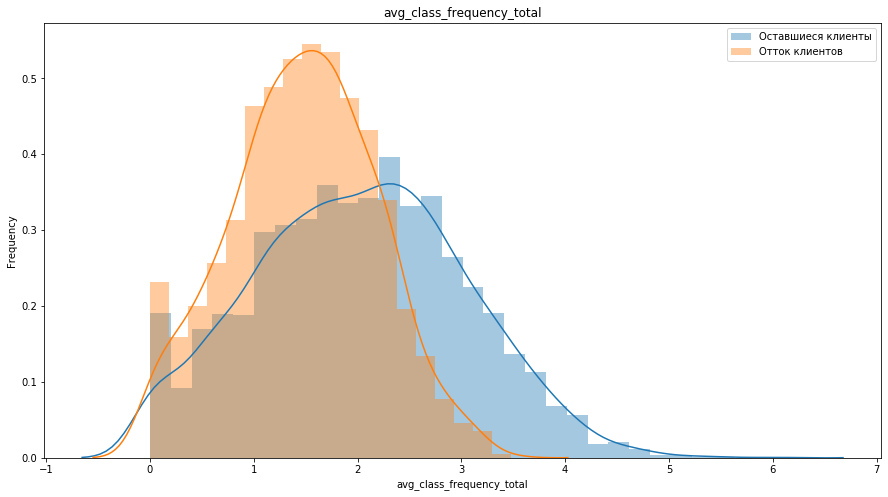

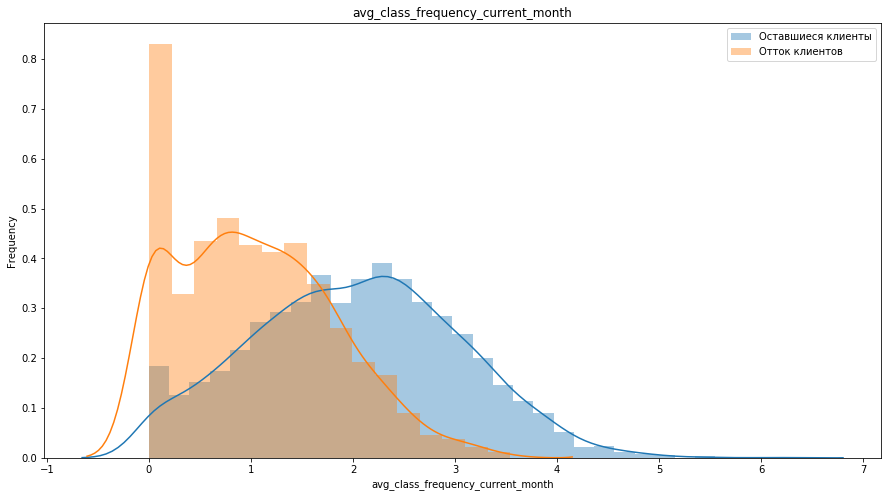

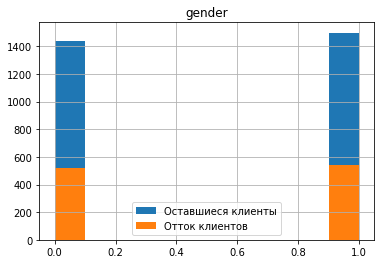

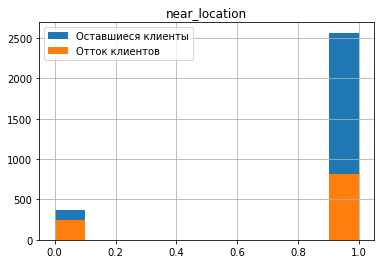

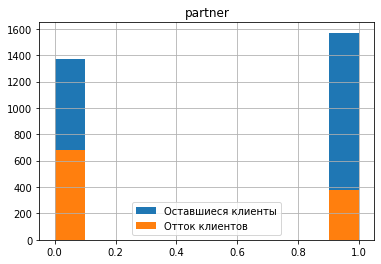

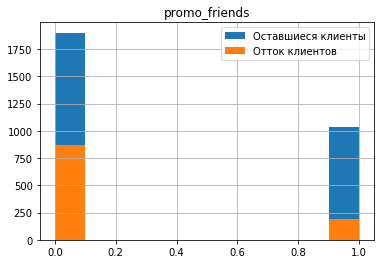

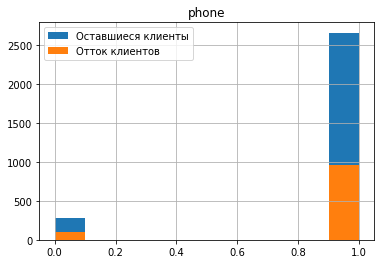

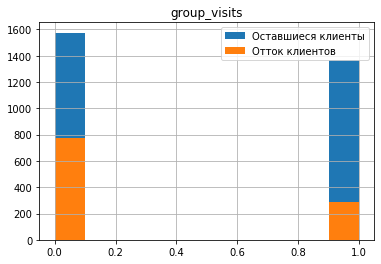

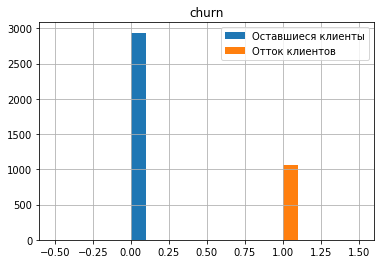

In [9]:
def distplot(column, data0, data1):
    plt.figure(figsize=(15,8)) 
    plt.title(column)
    plt.ylabel('Frequency')
    ax1 = sns.distplot(data0[column])
    ax2 = sns.distplot(data1[column])
    plt.legend(['Оставшиеся клиенты', 'Отток клиентов'])
    plt.show()

distplot_list_of_columns = ['contract_period',
                            'age',
                            'avg_additional_charges_total', 
                            'month_to_end_contract',
                            'lifetime',
                            'avg_class_frequency_total', 
                            'avg_class_frequency_current_month'
                            ]

gym_churn_0 = gym.query('churn == 0')
gym_churn_1 = gym.query('churn == 1')

for column in distplot_list_of_columns:
    distplot(column, gym_churn_0, gym_churn_1)


for column in gym.columns:
    if column not in distplot_list_of_columns:
        gym.groupby('churn')[column].hist()
        plt.title(column)
        plt.legend(['Оставшиеся клиенты', 'Отток клиентов'])
        plt.show()

Можно было бы посчитать выбросами нулевые значения посещаемости спортзала среди клиентов, ушедших в отток, однако, скорее всего,  клиенты купили абонемент на месяц и не сходили ни разу

### Постройте матрицу корреляций и отобразите её

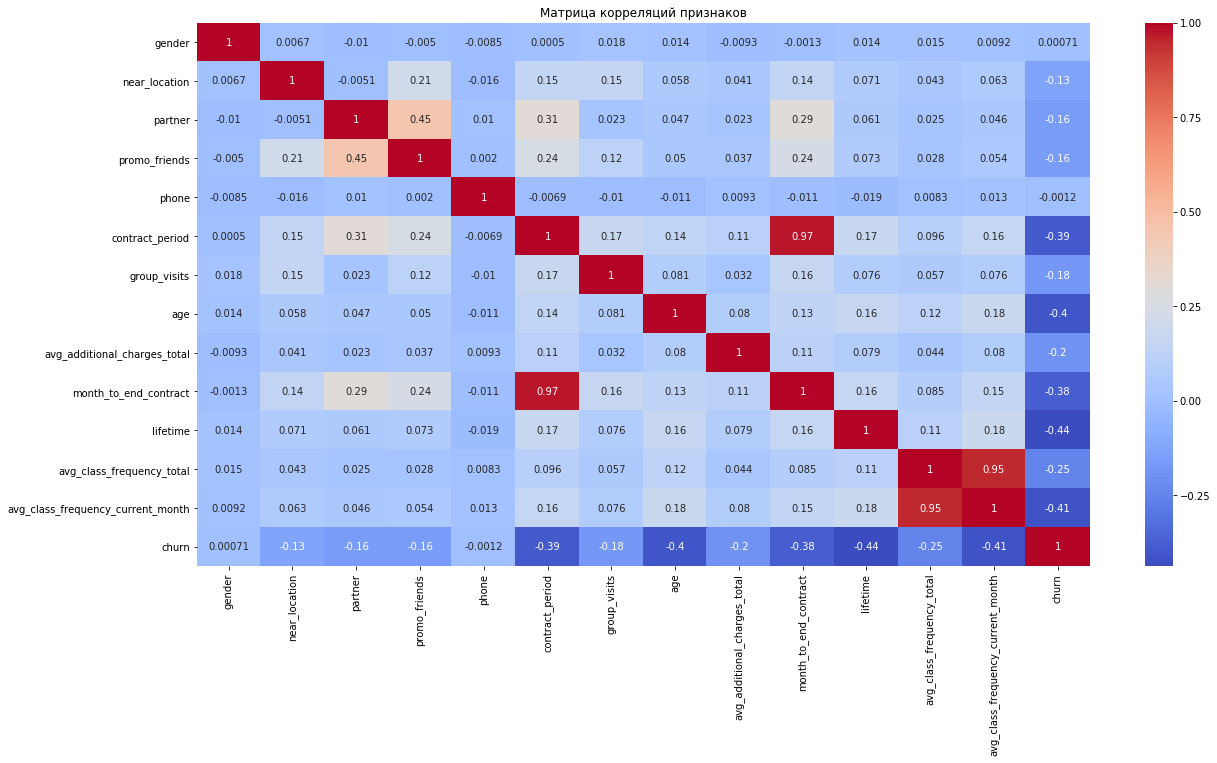

In [10]:
gym_corr = gym.corr()

plt.figure(figsize= (20,10))
plt.title('Матрица корреляций признаков')
sns.heatmap(gym_corr, annot = True, cmap= 'coolwarm')

Имеются несколько мультиколлинеарных признаков:
- contract_period и month_to_end_contact
- avg_class_frequency_total и avg_class_frequency_current_month

Их можно не удалять при построении модели, потому что модели логистической регресии и случайного леса не являются линейными

Также нет признаков, которые сильно коррелируют с целевой переменной «Churn»

### Исследовательский анализ данных (EDA): выводы

Провели исследовательский анализ данных:

1. Открыли файл csv и привели названия столбцов таблицы к нижнему регистру

2. Определили размер датасета gym: 4000 наблюдений, 14 признаков

3. Проверили столбцы таблицы на наличие пропусков и дубликатов - их не было обнаружено

4. Все типы признаков числовые, поэтому преобразования категориальных признаков в числовые не потребовалось

5. Изучили средние значения признаков:
    - Распределение по признаку gender почти равномерно (представителей пола 1 чуть больше, но незначительно)
    - В фитнес-центр Культурист-датасаентист в основном ходят люди, которые живут или работают рядом (85% клиентов)
    - Почти половина клиентов фитнес-клуба являются сотрудниками компаний-партнёров клуба и получают скидки на фитнес
    - 30% клиентов купили абонемент на фитнес по акции "Приведи друга"
    - 90% клиентов оставили контактный телефон для связи
    - Средний срок действия абонемента на фитнес - 4.7 месяцев
    - Чуть больше 40% клиентов посещают групповые занятия
    - Средний возраст клиентов - 29 лет
    - Средняя суммарная выручка от дополнительных услуг фитнес-центра равна 147
    - Средний срок до окончания договора - 4.3 месяца
    - Среднее время с момента первого обращения в фитнес-центр - 3.7 месяца
    - Средняя частота посещений в неделю за все время с начала действия абонемента - 1.9 раза в неделю
    - Средняя частота посещений в неделю за предыдущий месяц - 1.8 раза в неделю
    - 27% клиентов перестали пользоваться услугами фитнес-центра в текущем месяце
    
    
6. Изучили средние значения признаков для оставшихся клиентов и клиентов, ушедших в отток:

    - Рапределение по полу почти не отличается
    - Среди тех, кто ушел в отток, больше тех, кто жил и работал далеко от фитнес-центра
    - Сотрудники компаний-партнеров почти на 20% реже перестают посещать спортзал
    - Клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток
    - Предоставление контактного номера телефона не влияет на уход в отток
    - Средняя длительность договора почти в 2 раза больше у оставшихся клиентов
    - Оставшиеся пользователи почти в 2 раза чаще ходят на групповые занятия 
    - Средний возраст оставшихся клиентов - 30 лет, средний возраст клиентов, ушедших в отток - 27 лет
    - Больше средней выручки от дополнительных услуг приносят оставшиеся клиенты 158 по сравнению со 115 для оттока
    - Оставшееся время до окончания срока действия договора больше у оставшихся клиентов
    - Среднее время с момента первого обращения в фитнес-центр - 5 месяцев у оставшихся клиентов и 1 месяц у ушедших в отток
    - У ушедших в отток клиентов средняя частота посещений в неделю за все время с начала действия абонемента - 1.5 раза в неделю, а у оставшихся - 2 раза в неделю
    - Средняя частота посещений в неделю за предыдущий месяц - 1 раз в неделю у ушедших в отток, а у оставшихся - 2 раза в неделю


7. Построили столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток). Нашли аномальные значения, которые можно было бы посчитать выбросами нулевые значения посещаемости спортзала среди клиентов, ушедших в отток, однако, скорее всего, эти клиенты купили абонемент на месяц и не сходили ни разу

8. Построили матрицу корреляций, на которой обнаружили несколько мультиколлинеарных признаков, которые можно не удалять при построении модели, потому что модели логистической регресии и случайного леса не являются линейными. Признаков, которые сильно коррелируют с целевой переменной «Churn» не обнаружено

## Построение модели прогнозирования оттока клиентов

### Разбейте данные на обучающую и валидационную выборку функцией train_test_split().

Целевая переменная НЕ ИМЕЕТ временной структуры - можно делить выборку случайным образом, поскольку здесь мы пренебрегаем влиянием соседних наблюдений (посетителей спортзала) друг на друга.

In [11]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym.drop(columns=['churn'])
y = gym['churn']

# разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Обучите модель на train-выборке двумя способами:
- логистической регрессией,
- случайным лесом.

In [12]:
# обучаем модель логистической регрессией
lr_model = LogisticRegression(solver='liblinear', random_state = 0)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]

# обучаем модель случайным лесом
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]

### Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик? 
Не забудьте указать параметр random_state при разделении выборки и задании алгоритма.

In [13]:
print(
    'Метрики для модели логистической регрессии:',
    '\nAccuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)),
    '\nPrecision: {:.2f}'.format(precision_score(y_test, lr_predictions)),
    '\nRecall: {:.2f}'.format(recall_score(y_test, lr_predictions))
)

print()

print(
    'Метрики для модели случайного леса:',
    '\nAccuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)),
    '\nPrecision: {:.2f}'.format(precision_score(y_test, rf_predictions)),
    '\nRecall: {:.2f}'.format(recall_score(y_test, rf_predictions))
)

Метрики для модели логистической регрессии: 
Accuracy: 0.93 
Precision: 0.86 
Recall: 0.83

Метрики для модели случайного леса: 
Accuracy: 0.92 
Precision: 0.84 
Recall: 0.82


Лучше себя показала модель логистической регрессии - каждая ее метрика выше, чем у модели логистической регрессии 

In [14]:
final_model = LogisticRegression(solver='liblinear', random_state = 0)

final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)


# создадим датафрейм с именами признаков и их важностью и выведем его по убыванию важности
features = pd.DataFrame(final_model.coef_.T, X.columns).reset_index()
features.columns = ['feature', 'coef']
features['coef_abs'] = abs(features['coef'])

features.sort_values(by = 'coef_abs', ascending = False)


,feature,coef,coef_abs
12,avg_class_frequency_current_month,-4.161979,4.161979
11,avg_class_frequency_total,3.470850,3.470850
10,lifetime,-0.972874,0.972874
6,group_visits,-0.712743,0.712743
4,phone,0.611301,0.611301
3,promo_friends,-0.568434,0.568434
5,contract_period,-0.188969,0.188969
7,age,-0.181963,0.181963
9,month_to_end_contract,-0.066940,0.066940
1,near_location,0.052976,0.052976


### Построение модели прогнозирования оттока клиентов: выводы

1. Целевая переменная не имеет временной структуры - делили выборку случайным образом, поскольку здесь можно пренебречь влиянием соседних наблюдений (посетителей спортзала) друг на друга
2. Разбили данные на обучающую и валидационную выборку функцией train_test_split(), обучили модель логистической регрессией и случайным лесом.
3. Сравнили метрики accuracy, precision и recall для обеих моделей на валидационной выборке - лучше себя показала модель логистической регрессии:
    - Метрики для модели логистической регрессии: 
        - Accuracy: 0.93 
        - Precision: 0.86 
        - Recall: 0.83

    - Метрики для модели случайного леса: 
        - Accuracy: 0.92 
        - Precision: 0.84 
        - Recall: 0.82


4. Повторно обучили модель логистической регрессии и создали датафрейм с именами признаков модели и их кэффициентом - наиболее важным для прогноза признаком является avg_class_frequency_current_month

## Кластеризация клиентов


### Стандартизируйте данные.

In [15]:
# создаём объект класса scaler (нормализатор)
scaler = StandardScaler() 

# обучаем нормализатор и преобразуем набор данных
X_sc = scaler.fit_transform(X) 

### Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. 

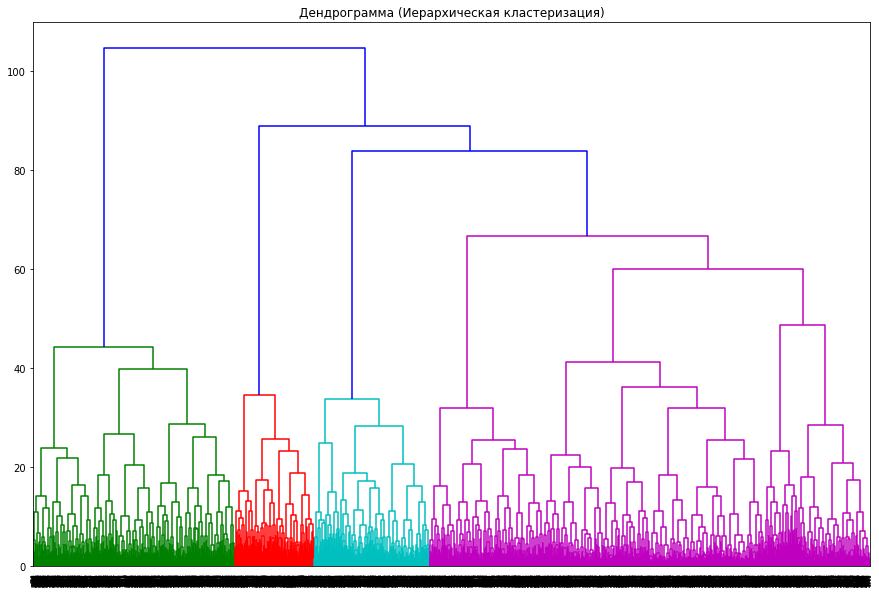

In [16]:
# Строим матрицу расстояний функцией linkage() 
linked = linkage(X_sc, method = 'ward') 

# Рисуем дендрограмму, чтобы определить количество кластеров для алгоритма K-Means 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма (Иерархическая кластеризация)')
plt.show() 

Предложенное оптимальное число кластеров 4 — четыре разных цвета на графике.

### Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).

In [17]:
# задаём число кластеров, равное 5
km = KMeans(n_clusters = 5, random_state=0) 

# применяем алгоритм к данным и формируем вектор кластеров 
labels = km.fit_predict(X_sc) 

# сохраняем метки кластера в поле нашего датасета
gym['cluster'] = labels

### Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить? Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?

In [18]:
# выводим статистику по средним значениям наших признаков по кластеру
gym.groupby(['cluster']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


- Кластер 0:
    - Отток клиентов на уровне 3%
    - Наибольший процент клиентов, пришедших от компаний-партнеров и по акции "приведи друга"
    - Наибольший средний срок действия абонемента - почти 11 месяцев
    - Больше всего посещений групповых занятий клиентами 
    - Второй кластер по средней выручке за доп услуги фитнес-центра

- Кластер 1:
    - Отток клиентов на уровне 27%
    - Второй по величине процент клиентов, пришедших от компаний-партнеров и по акции "приведи друга"
    - Нет контактных номеров телефона
    - Второй кластер по длительности срока действия абонемента
    
- Кластер 2:
    - Отток клиентов на уровне 44%
    - Проживают или работают далеко от фитнес-клуба
    - Меньше всего используют акцию "приведи друга" (8%)
    - Реже всего посещают групповые занятия (22%)

- Кластер 3:
    - Отток клиентов на уровне 51%
    - Меньше всего используют скидки от компаний-партнеров (35%)  
    - Покупают самые короткие абонементы (2 месяца)
    - Самые молодые клиенты фитнес-зала
    - Меньше всего тратят на дополнительные услуги
    - Наименьший средний срок "жизни" клиента - 2,4 месяца
    - Реже всех ходят в фитнес-зал (1 раз в неделю)

- Кластер 4:
    - Отток клиентов на уровне 7%
    - Больше всего клиентов пола 1
    - Самые взрослые клиенты фитнес-зала - страше 30 лет
    - Больше всего тратят на дополнительные услуги
    - Наибольший средний срок "жизни" клиента - 4.9 месяца
    - Чаще всех ходят в фитнес-зал (почти 3 раза в неделю)

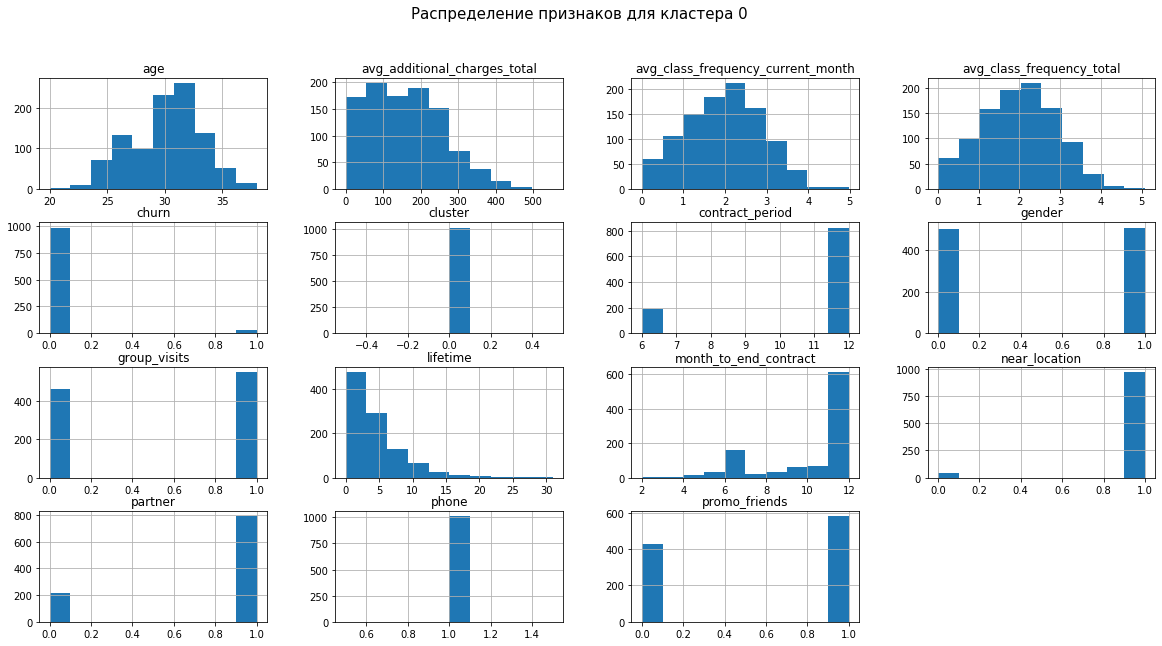

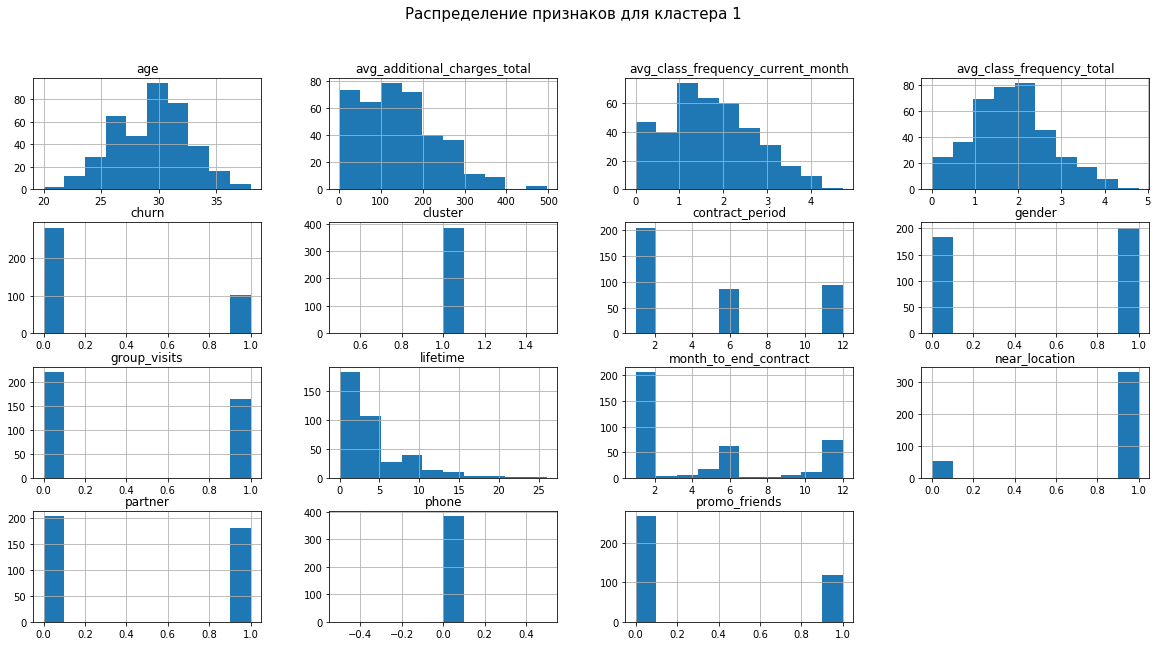

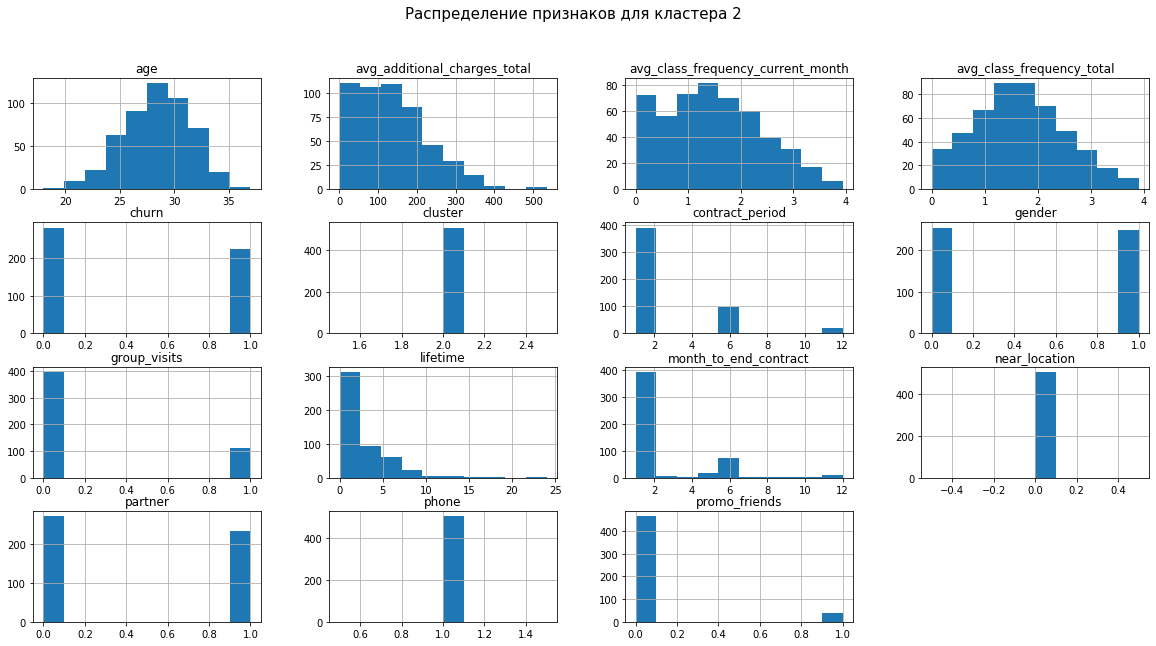

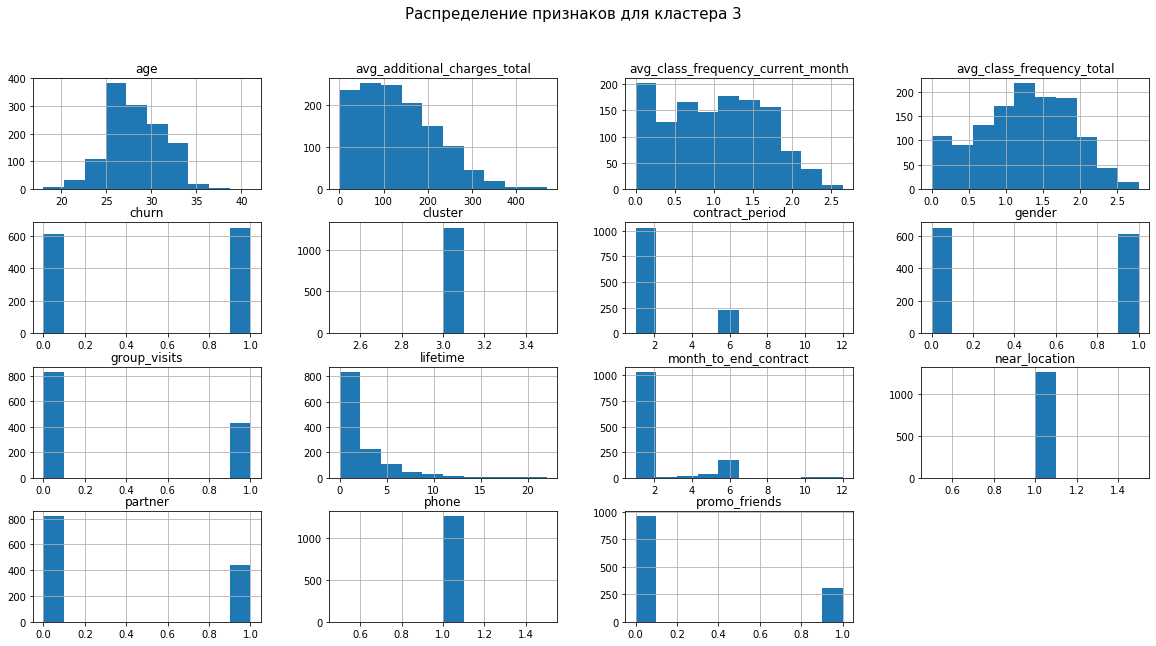

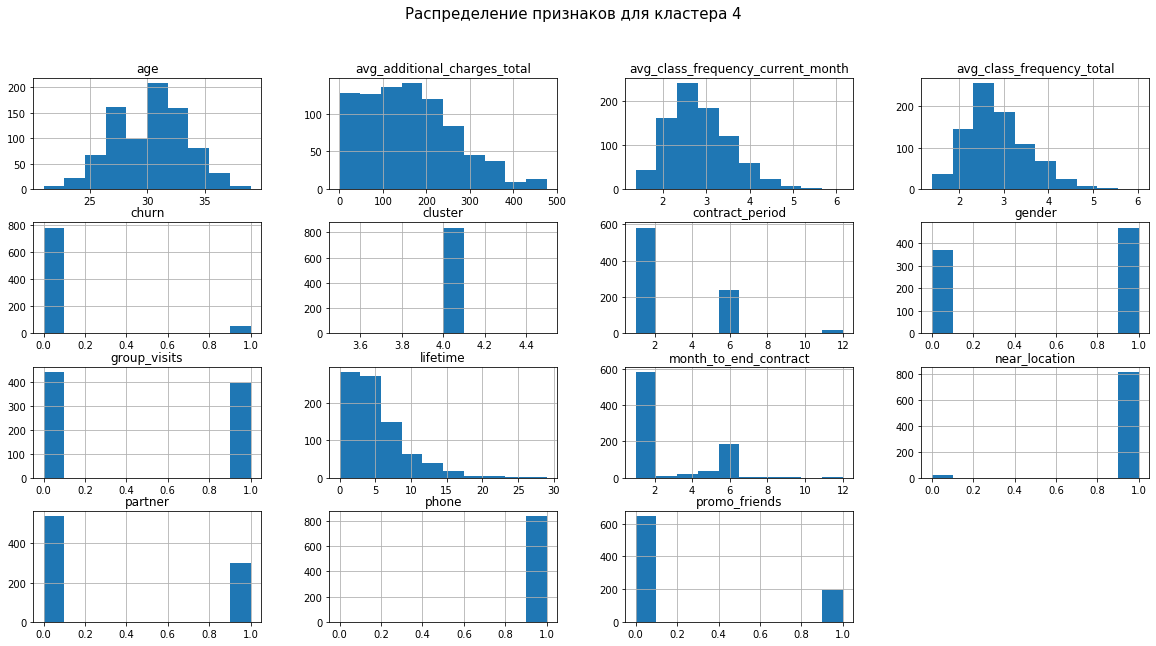

In [19]:
# Строим распределение для признаков
clusters = [0, 1, 2, 3, 4]
for i in clusters:
    gym[gym['cluster'] == i].hist(figsize=(20,10))
    plt.suptitle('Распределение признаков для кластера {}'.format(i), fontsize = 15)
    plt.show()

### Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [20]:
gym.groupby(['cluster']).agg({'churn': 'mean'}).reset_index()

,cluster,churn
0,0,0.027695
1,1,0.267532
2,2,0.443564
3,3,0.514263
4,4,0.068100


- Наиболее надежные кластеры - 0 и 4
- Средняя надежность у кластера 1
- Кластеры, склонные к оттоку клиентов - 2 и 3

### Кластеризация клиентов: выводы

1. Стандартизировали данные 
2. Построили матрицу расстояний и нарисовали дендрограмму, чтобы определить оптимальное число кластеров. Оптимальное количество кластеров равно 4 — четыре разных цвета на графике.
3. Обучили модель кластеризации на основании алгоритма K-Means и спрогнозировали кластеры клиентов, добавив информацию по ним в датафрейм gym
4. Построили распределения признаков для кластеров и на их основании составили характерное описание для каждого кластера: 

- Кластер 0:

    - Отток клиентов на уровне 3%
    - Наибольший процент клиентов, пришедших от компаний-партнеров и по акции "приведи друга"
    - Наибольший средний срок действия абонемента - почти 11 месяцев
    - Больше всего посещений групповых занятий клиентами 
    - Второй кластер по средней выручке за доп услуги фитнес-центра

- Кластер 1:

    - Отток клиентов на уровне 27%
    - Второй по величине процент клиентов, пришедших от компаний-партнеров и по акции "приведи друга"
    - Нет контактных номеров телефона
    - Второй кластер по длительности срока действия абонемента
    
- Кластер 2:

    - Отток клиентов на уровне 44%
    - Проживают или работают далеко от фитнес-клуба
    - Меньше всего используют акцию "приведи друга" (8%)
    - Реже всего посещают групповые занятия (22%)

- Кластер 3:

    - Отток клиентов на уровне 51%
    - Меньше всего используют скидки от компаний-партнеров (35%)  
    - Покупают самые короткие абонементы (2 месяца)
    - Самые молодые клиенты фитнес-зала
    - Меньше всего тратят на дополнительные услуги
    - Наименьший средний срок "жизни" клиента - 2,4 месяца
    - Реже всех ходят в фитнес-зал (1 раз в неделю)

- Кластер 4:

    - Отток клиентов на уровне 7%
    - Больше всего клиентов пола 1
    - Самые взрослые клиенты фитнес-зала - страше 30 лет
    - Больше всего тратят на дополнительные услуги
    - Наибольший средний срок "жизни" клиента - 4.9 месяца
    - Чаще всех ходят в фитнес-зал (почти 3 раза в неделю)

5.  - Наиболее надежные кластеры - 0 и 4
    - Средняя надежность у кластера 1
    - Кластеры, склонные к оттоку клиентов - 2 и 3

## Выводы и базовые рекомендации по работе с клиентами

1. Изучили средние значения признаков:

    - Распределение по признаку gender почти равномерно (представителей пола 1 чуть больше, но незначительно)
    - В фитнес-центр Культурист-датасаентист в основном ходят люди, которые живут или работают рядом (85% клиентов)
    - Почти половина клиентов фитнес-клуба являются сотрудниками компаний-партнёров клуба и получают скидки на фитнес
    - 30% клиентов купили абонемент на фитнес по акции "Приведи друга"
    - 90% клиентов оставили контактный телефон для связи
    - Средний срок действия абонемента на фитнес - 4.7 месяцев
    - Чуть больше 40% клиентов посещают групповые занятия
    - Средний возраст клиентов - 29 лет
    - Средняя суммарная выручка от дополнительных услуг фитнес-центра равна 147
    - Средний срок до окончания договора - 4.3 месяца
    - Среднее время с момента первого обращения в фитнес-центр - 3.7 месяца
    - Средняя частота посещений в неделю за все время с начала действия абонемента - 1.9 раза в неделю
    - Средняя частота посещений в неделю за предыдущий месяц - 1.8 раза в неделю
    - 27% клиентов перестали пользоваться услугами фитнес-центра в текущем месяце
    

2. Изучили средние значения признаков для оставшихся клиентов и клиентов, ушедших в отток:

    - Рапределение по полу почти не отличается
    - Среди тех, кто ушел в отток, больше тех, кто жил и работал далеко от фитнес-центра
    - Сотрудники компаний-партнеров почти на 20% реже перестают посещать спортзал
    - Клиенты, пришедшие по акции "Приведи друга" в два раза реже уходят в отток
    - Предоставление контактного номера телефона не влияет на уход в отток
    - Средняя длительность договора почти в 2 раза больше у оставшихся клиентов
    - Оставшиеся пользователи почти в 2 раза чаще ходят на групповые занятия
    - Средний возраст оставшихся клиентов - 30 лет, средний возраст клиентов, ушедших в отток - 27 лет
    - Больше средней выручки от дополнительных услуг приносят оставшиеся клиенты 158 по сравнению со 115 для оттока
    - Оставшееся время до окончания срока действия договора больше у оставшихся клиентов
    - Среднее время с момента первого обращения в фитнес-центр - 5 месяцев у оставшихся клиентов и 1 месяц у ушедших в отток
    - У ушедших в отток клиентов средняя частота посещений в неделю за все время с начала действия абонемента - 1.5 раза в неделю, а у оставшихся - 2 раза в неделю
    - Средняя частота посещений в неделю за предыдущий месяц - 1 раз в неделю у ушедших в отток, а у оставшихся - 2 раза в неделю


3. Составили характерное описание для каждого кластера: 

- Кластер 0:

    - Отток клиентов на уровне 3%
    - Наибольший процент клиентов, пришедших от компаний-партнеров и по акции "приведи друга"
    - Наибольший средний срок действия абонемента - почти 11 месяцев
    - Больше всего посещений групповых занятий клиентами 
    - Второй кластер по средней выручке за доп услуги фитнес-центра

- Кластер 1:

    - Отток клиентов на уровне 27%
    - Второй по величине процент клиентов, пришедших от компаний-партнеров и по акции "приведи друга"
    - Нет контактных номеров телефона
    - Второй кластер по длительности срока действия абонемента
    
- Кластер 2:

    - Отток клиентов на уровне 44%
    - Клиенты проживают или работают далеко от фитнес-клуба
    - Меньше всего используют акцию "приведи друга" (8%)
    - Реже всего посещают групповые занятия (22%)

- Кластер 3:

    - Отток клиентов на уровне 51%
    - Меньше всего используют скидки от компаний-партнеров (35%)  
    - Покупают самые короткие абонементы (2 месяца)
    - Самые молодые клиенты фитнес-зала
    - Меньше всего тратят на дополнительные услуги
    - Наименьший средний срок "жизни" клиента - 2,4 месяца
    - Реже всех ходят в фитнес-зал (1 раз в неделю)

- Кластер 4:

    - Отток клиентов на уровне 7%
    - Больше всего клиентов пола 1
    - Самые взрослые клиенты фитнес-зала - страше 30 лет
    - Больше всего тратят на дополнительные услуги
    - Наибольший средний срок "жизни" клиента - 4.9 месяца
    - Чаще всех ходят в фитнес-зал (почти 3 раза в неделю)

4.  Определили наиболее и наименее надежные кластеры:
    - Наиболее надежные кластеры - 0 и 4
    - Средняя надежность у кластера 1
    - Кластеры, склонные к оттоку клиентов - 2 и 3
    
**Рекомендации для стратегии взаимодействия с клиентами и их удержания:**

1. Кластеры 0 и 4:
    - Эти кластеры наиболее надежные, для них нужно предоставить скидки на большие по срокам действия абонементы, возможно, добавить дополнительный месяц заморозки фитнес-карты для лояльных клиентов.


2. Кластер 1:
     - У этого кластера второй по величине процент клиентов, пришедших от компаний-партнеров и по акции "приведи друга", поэтому стоит предложить клиентам фитнес-клуба, которые еще не имеют скидок на абонементы, организовать сотрудничество фитнес-клуба с их компаниями-работодателями, предоставив в качестве вознаграждения бесплатные групповые тренировки, которые популярны в 1 кластере.
     

3. Кластер 2:
     - Для этого кластера характерной чертной является проживание (или работа) клиентов вдалеке от фитнес-клуба, поэтому, стоит привлечь этих клиентов следующей маркетинговой активностью: 
         - первый месяц тренировок необходимо оплатить по полной стоимости,
         - если клиент предоставит на следующий месяц показания шагомера больше 10тыс. шагов за каждый день, то предусмотрены скидки: 10тыс шагов каждый день - 10%, 20 тыс шагов каждый день -20%, но не более 20% скидки


4. Кластер 3:
     - В кластере 3 присутствуют самые молодые клиенты фитнес-зала, которые меньше всего тратят на дополнительные услуги, возможно, стоит сделать скидки для студентов